In [1]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기

In [2]:
import pandas as pd

df = pd.read_csv(
    "../data/df2_0129.csv"
)

df

,url,title,company,location,scrape_date,scrape_time
0,https://in.indeed.com/viewjob?jk=8a6bb0507eba5bbf,Data Engineer/ETL Developer,Princeton IT America,"KA, IN",2025-07-16,12:23:55
1,https://www.linkedin.com/jobs/view/4265959832,2702- Data Engineer,EXL,"Pune, Maharashtra, India",2025-07-16,12:23:55
2,https://www.linkedin.com/jobs/view/4267652354,Data Engineer,SatSure,"Bangalore Urban, Karnataka, India",2025-07-16,12:23:55
3,https://www.linkedin.com/jobs/view/4267647369,DevOps/Cloud Engineer,BayOne Solutions,"Bengaluru, Karnataka, India",2025-07-16,12:23:55
4,https://www.linkedin.com/jobs/view/4265960423,AI Developer – Immediate Joiners Only,Perimattic,"Mumbai, Maharashtra, India",2025-07-16,12:23:55
...,...,...,...,...,...,...
2227,https://www.linkedin.com/jobs/view/4309720429,Data Scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2228,https://www.linkedin.com/jobs/view/4309719532,Data Scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2229,https://www.linkedin.com/jobs/view/4309701623,Data Scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2230,https://www.linkedin.com/jobs/view/4309703481,Senior AI Developer - Bangalore,SAP,"Bengaluru, Karnataka, India",2025-10-06,10:23:15


In [3]:
df.loc[df["url"]=="https://www.linkedin.com/jobs/view/4267655980",:]

,url,title,company,location,scrape_date,scrape_time
49,https://www.linkedin.com/jobs/view/4267655980,Senior DevOps Engineer,CG-VAK Software & Exports Ltd.,"Coimbatore, Tamil Nadu, India",2025-07-16,12:45:54


# 2. 데이터 전처리

## 1) 데이터 확인

In [4]:
df.shape

(2232, 6)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   url          2232 non-null   str  
 1   title        2232 non-null   str  
 2   company      2231 non-null   str  
 3   location     1798 non-null   str  
 4   scrape_date  2232 non-null   str  
 5   scrape_time  2232 non-null   str  
dtypes: str(6)
memory usage: 104.8 KB


In [12]:
# Show all DataFrame columns
pd.set_option('display.max_columns', None)

In [13]:
df.head(1)

,url,title,company,location,scrape_date,scrape_time
0,https://in.indeed.com/viewjob?jk=8a6bb0507eba5bbf,Data Engineer/ETL Developer,Princeton IT America,"KA, IN",2025-07-16,12:23:55


## 2) 데이터 형변환

In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   url          2232 non-null   str  
 1   title        2232 non-null   str  
 2   company      2231 non-null   str  
 3   location     1798 non-null   str  
 4   scrape_date  2232 non-null   str  
 5   scrape_time  2232 non-null   str  
dtypes: str(6)
memory usage: 104.8 KB


In [28]:
df.head(1)

,url,title,company,location,scrape_date,scrape_time
0,https://in.indeed.com/viewjob?jk=8a6bb0507eba5bbf,Data Engineer/ETL Developer,Princeton IT America,"KA, IN",2025-07-16,12:23:55


In [29]:
df["title"].unique()

<StringArray>
[                           'Data Engineer/ETL Developer',
                                    '2702- Data Engineer',
                                          'Data Engineer',
                                  'DevOps/Cloud Engineer',
                  'AI Developer – Immediate Joiners Only',
                                     'GCP Cloud Engineer',
                           'Big Data Engineer (5+ Years)',
                                        'DevOps Engineer',
                                      'DevOps Consultant',
                                   'Senior Data Engineer',
 ...
                      'Sr Staff Data Scientist - Creator',
                     'Machine Learning Engineer (Speech)',
       'AI & Machine Learning Engineer (Immediate Start)',
                     'Principal Computer Vision Engineer',
 'Gen Artificial Intelligence/ Machine Learning Engineer',
                     'Gen AI developer - GO/JC/1233/2025',
     'AI & Machine Learning Engineer 

In [30]:
df["title"].nunique()

758

In [31]:
df_prep = df.drop(columns="url")

In [32]:
df_prep.isna().sum()

title            0
company          1
location       434
scrape_date      0
scrape_time      0
dtype: int64

In [42]:
df_prep.to_csv("./jobs_merged_0129_prep.csv")

In [141]:
import re

df = pd.read_csv(
    "./jobs_merged_0129_prep.csv",
    index_col=0
)

col = "title"

df.head(1)

,title,company,location,scrape_date,scrape_time
0,Data Engineer/ETL Developer,Princeton IT America,"KA, IN",2025-07-16,12:23:55


In [142]:
# 1) title에서 속성(레벨/근무형태/고용형태) 추출
SENIORITY_PATTERNS = {
    "intern": r"\b(intern|internship|trainee)\b",
    "junior": r"\b(junior|jr)\b",
    "senior": r"\b(senior|sr|staff|principal|lead|head|director|vp|vice president|manager)\b",
}

WORKMODE_PATTERNS = {
    "remote": r"\b(remote|wfh|work from home)\b",
    "hybrid": r"\b(hybrid)\b",
    "onsite": r"\b(onsite|on site|on-site)\b",
}

EMPLOYMENT_PATTERNS = {
    "contract": r"\b(contract|freelance|freelancer|part[- ]time|part time)\b",
    "full_time": r"\b(full[- ]time|full time)\b",
}

NOISE_PATTERNS = [
    r"\b(immediate joiners only|immediate joiner|immediate joining|joiners)\b",
    r"\b(only equity)\b",
    r"\b(ref#?\d+|r-\d+|t\d+-\d+)\b",  # REF#284462, R-17677, T500-19212 등
    r"\b(\d+\+?\s*years?\s*exp|\d+\+?\s*yoe)\b",  # 5+ years, 10+Years, 5+ YoE
]

In [143]:
# 2) 전처리 함수 정의
def extract_bracket_text(s: str) -> str:
    # ()와 [] 안의 텍스트를 모두 추출해서 ' | '로 연결
    if pd.isna(s):
        return ""
    s = str(s)
    parens = re.findall(r"\((.*?)\)", s)
    squares = re.findall(r"\[(.*?)\]", s)
    parts = [p.strip() for p in (parens + squares) if p.strip()]
    return " | ".join(parts)

def clean_title(s: str) -> str:
    if pd.isna(s):
        return ""
    s = str(s)

    s = s.replace("\u202f", " ")  # 유니코드 narrow no-break space 없애기
    s = s.replace("–", "-").replace("—", "-").replace("−", "-") # 대쉬로 맞추기

    s = s.replace("&amp;", "and")   # HTML 엔티티 흔한 것 처리
    
    s = s.lower().strip()           # 소문자, 스페이스 때어내기

    # 앞쪽에 붙는 ID/번호 패턴 제거: "2702- data engineer", "2638 - ..."
    s = re.sub(r"^\s*\d{2,6}\s*[-_:]\s*", "", s)

    # 괄호/대괄호 안 정보는 일단 제거 (기술스택/연차/장식이 많아서)
    # 필요하면 나중에 별도 컬럼으로 추출 가능
    s = re.sub(r"\(.*?\)", " ", s)
    s = re.sub(r"\[.*?\]", " ", s)

    # 구분자 통일: / | , _ -> 공백
    s = re.sub(r"[\/\|,_]+", " ", s)

    # 특수문자 정리(단어/공백/하이픈만 남김)
    s = re.sub(r"[^a-z0-9\s\-]+", " ", s)

    # 하이픈은 구분자로 취급(단, 단어 사이 연결은 띄어쓰기)
    s = re.sub(r"\s*-\s*", " ", s)

    # 공백 정리
    s = re.sub(r"\s+", " ", s).strip()

    return s

def extract_first_match(text: str, pattern_dict: dict) -> str:
    for label, pat in pattern_dict.items():
        if re.search(pat, text, flags=re.IGNORECASE):
            return label
    return "unknown"


def remove_noise(text: str) -> str:
    t = text
    for pat in NOISE_PATTERNS:
        t = re.sub(pat, " ", t, flags=re.IGNORECASE)
    t = re.sub(r"\s+", " ", t).strip()
    return t


# ---------- 괄호 안 텍스트 정제 + item 분해 ----------
def clean_paren_text(s: str) -> str:
    if not s:
        return ""
    s = s.replace("\u202f", " ")
    s = s.replace("&amp;", "and")
    s = s.replace("–", "-").replace("—", "-").replace("−", "-")
    s = s.lower().strip()

    # 급여/통화 제거(필요시 확장)
    s = re.sub(r"\$[\d,]+(\s*-\s*\$?[\d,]+)?", " ", s)

    # 괄호안은 쉼표/슬래시/플러스/&/and가 구분자 역할을 많이 함
    s = re.sub(r"[^a-z0-9\s\+\-\/,\.|&]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s



In [144]:
# 3) 직무 그룹 매핑 (EDA용)
ROLE_GROUP_RULES = [
    ("data_engineering", r"\b(data engineers?|etl developers?|data warehouse|data integration|databricks?|snowflake|data engineering)\b"),
    ("ml_ai", r"\b(ai developers?|machine learning|ml engineers?|ai engineers?|gen ?ai|generative ai|llm|nlp|computer vision|cv engineers?|applied ai|ai engineering|ai specialists?|ai researchers?)\b"),
    ("devops_sre", r"\b(devops|sre|site reliability|platform engineers?)\b"),
    ("cloud", r"\b(cloud engineers?|gcp|aws|azure|oci|oracle cloud|cloud platform)\b"),
    ("data_science", r"\b(data scientists?)\b"),
    ("analyst_bi", r"\b(data analysts?|bi analysts?|business intelligence|analytics)\b"),
    ("software_backend", r"\b(software engineers?|developers?|backend|full stack|sde)\b"),
]

def map_role_group(text: str) -> str:
    for group, pat in ROLE_GROUP_RULES:
        if re.search(pat, text, flags=re.IGNORECASE):
            return group
    return "other"


In [145]:
# 4) 실행: 전처리 컬럼 생성
df["title_raw"] = df[col].astype(str)

df["paren_raw"] = df["title_raw"].apply(extract_bracket_text)
df["title_clean"] = df["title_raw"].apply(clean_title)
df["title_clean"] = df["title_clean"].apply(remove_noise)

df["seniority"] = df[col].apply(lambda x: extract_first_match(x, SENIORITY_PATTERNS))
df["work_mode"] = df[col].apply(lambda x: extract_first_match(x, WORKMODE_PATTERNS))
df["employment_type"] = df[col].apply(lambda x: extract_first_match(x, EMPLOYMENT_PATTERNS))

df["role_group"] = df["title_clean"].apply(map_role_group)

# (선택) 토큰 리스트도 만들고 싶으면
#df_prep["title_tokens"] = df_prep["title_clean"].str.split()

# 결과 확인 (상위 몇 개만)
df[["title_clean", "role_group", "seniority", "work_mode", "employment_type", "paren_raw"]].head(50)

,title_clean,role_group,seniority,work_mode,employment_type,paren_raw
0,data engineer etl developer,data_engineering,unknown,unknown,unknown,
1,data engineer,data_engineering,unknown,unknown,unknown,
2,data engineer,data_engineering,unknown,unknown,unknown,
3,devops cloud engineer,devops_sre,unknown,unknown,unknown,
4,ai developer,ml_ai,unknown,unknown,unknown,
5,gcp cloud engineer,cloud,unknown,unknown,unknown,
6,big data engineer,data_engineering,unknown,unknown,unknown,5+ Years
7,data engineer etl developer,data_engineering,unknown,unknown,unknown,
8,devops engineer,devops_sre,unknown,unknown,unknown,
9,data engineer,data_engineering,unknown,unknown,unknown,


In [146]:
df.to_csv("01_role_group_prep.csv", index=False)

In [147]:
df["seniority"].value_counts()

seniority
unknown    1501
senior      542
intern      182
junior        7
Name: count, dtype: int64

In [148]:
mask = df["paren_raw"].str.contains("year", case=False, na=False)
df.loc[mask, "seniority"] = "senior"

In [149]:
mask = df["paren_raw"].str.contains("Year", case=False, na=False)
df.loc[mask, "seniority"] = "senior"

In [150]:
mask = df["paren_raw"].str.contains("yr", case=False, na=False)
df.loc[mask, "seniority"] = "senior"

In [151]:
mask = df["paren_raw"].str.contains("Yr", case=False, na=False)
df.loc[mask, "seniority"] = "senior"

In [152]:
df.loc[mask, :]

,title,company,location,scrape_date,scrape_time,title_raw,paren_raw,title_clean,seniority,work_mode,employment_type,role_group
759,PostgreSQL Data Engineer (8+ yrs)- Contract,"Gravity Infosolutions, Inc.",NaN,2025-09-19,10:25:17,PostgreSQL Data Engineer (8+ yrs)- Contract,8+ yrs,postgresql data engineer contract,senior,unknown,contract,data_engineering
1110,AI Engineer / ML Engineer (2–4 yrs),Nexoria Techworks Inc.,"Bengaluru, Karnataka, India",2025-09-23,07:39:15,AI Engineer / ML Engineer (2–4 yrs),2–4 yrs,ai engineer ml engineer,senior,unknown,unknown,ml_ai


In [156]:
df[df["role_group"] == "other"]

,title,company,location,scrape_date,scrape_time,title_raw,paren_raw,title_clean,seniority,work_mode,employment_type,role_group
157,Member of Technical Staff (DevOps),ThoughtSpot,"Hyderabad, Telangana, India",2025-07-16,11:32:17,Member of Technical Staff (DevOps),DevOps,member of technical staff,senior,unknown,unknown,other
206,"Prototyping Architect, Prototyping and Cloud E...",Amazon Web Services (AWS),"Mumbai, Maharashtra, India",2025-07-16,13:38:47,"Prototyping Architect, Prototyping and Cloud E...",PACE,prototyping architect prototyping and cloud en...,unknown,unknown,unknown,other
217,"Prototyping Architect, Prototyping and Cloud E...",Amazon Web Services (AWS),"Bengaluru, Karnataka, India",2025-07-16,14:21:03,"Prototyping Architect, Prototyping and Cloud E...",PACE,prototyping architect prototyping and cloud en...,unknown,unknown,unknown,other
364,AI Infrastructure Engineer (DevOps/MLOps),Qcentro,"KL, IN",2025-07-17,11:20:06,AI Infrastructure Engineer (DevOps/MLOps),DevOps/MLOps,ai infrastructure engineer,unknown,unknown,unknown,other
368,QA Engineer (Data Engineering & Warehouse Test...,RiDiK (a Subsidiary of CLPS. Nasdaq: CLPS),"Bengaluru, Karnataka, India",2025-07-17,11:20:06,QA Engineer (Data Engineering & Warehouse Test...,Data Engineering & Warehouse Testing,qa engineer,unknown,unknown,unknown,other
426,Data Architect - AEP Competency,Klarin Technologies,NaN,2025-07-17,14:47:47,Data Architect - AEP Competency,,data architect aep competency,unknown,unknown,unknown,other
433,"Apps Support Senior Analyst (Hadoop, Big Data,...",Citi,"Chennai, Tamil Nadu, India",2025-07-17,15:46:41,"Apps Support Senior Analyst (Hadoop, Big Data,...","Hadoop, Big Data, Data Engineering",apps support senior analyst c12 chennai,senior,unknown,unknown,other
753,Lead Data Architect,Tamcherry,"Kochi, Kerala, India",2025-09-19,10:25:17,Lead Data Architect,,lead data architect,senior,unknown,unknown,other
832,Data Architect Lead,ZS,"Pune, Maharashtra, India",2025-09-19,16:22:02,Data Architect Lead,,data architect lead,senior,unknown,unknown,other
841,(Senior Data Engineer/ Senior Software Enginee...,SPEC INDIA,"Ahmedabad, Gujarat, India",2025-09-19,16:22:02,(Senior Data Engineer/ Senior Software Enginee...,Senior Data Engineer/ Senior Software Engineer...,,senior,unknown,unknown,other


In [157]:
df["seniority"].value_counts()

seniority
unknown    1486
senior      557
intern      182
junior        7
Name: count, dtype: int64

In [158]:
df["role_group"].value_counts()

role_group
ml_ai               1274
data_engineering     307
devops_sre           216
data_science         212
analyst_bi           156
cloud                 47
other                 16
software_backend       4
Name: count, dtype: int64

In [159]:
# role group별 seniority 수요도 조사 - unknown은 제외
mask = df["seniority"].str.contains("unknown", case=False, na=False)

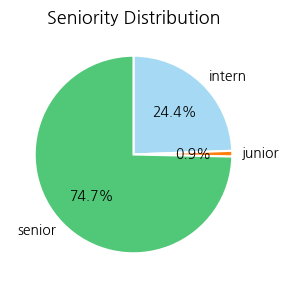

In [160]:
counts = df.loc[~mask, "seniority"].value_counts()

import matplotlib.pyplot as plt

COLOR_MAP = {
    "intern": "#a6daf4",   # 파란색
    "junior": "#ff7f0e",   # 주황색
    "senior": "#50c878"    # 초록색
}

# seniority 순서를 고정 (그래프마다 색 뒤바뀌는 것 방지)
order = ["intern", "junior", "senior"]
counts = counts.reindex(order).dropna()

colors = [COLOR_MAP[label] for label in counts.index]

plt.figure(figsize=(3, 3))
counts.plot(
    kind="pie",
    autopct="%.1f%%",
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1.5}
)

plt.ylabel("")
plt.title("Seniority Distribution", fontsize=13)
plt.tight_layout()
plt.show()

In [161]:
# multi-index 형태의 데이터
role_sr_summary = df.loc[~mask,:].groupby("role_group")["seniority"].value_counts()
role_sr_summary

role_group        seniority
analyst_bi        intern       127
                  senior         7
cloud             senior        14
                  intern         4
                  junior         1
data_engineering  senior        94
                  intern         2
                  junior         1
data_science      senior        82
                  intern         3
devops_sre        senior        66
                  intern         3
ml_ai             senior       285
                  intern        43
                  junior         5
other             senior         6
software_backend  senior         3
Name: count, dtype: int64

In [162]:
# df형태로 바꾸기
role_sr_df = role_sr_summary.unstack(fill_value=0)
role_sr_df

seniority,intern,junior,senior
role_group,,,
analyst_bi,127,0,7
cloud,4,1,14
data_engineering,2,1,94
data_science,3,0,82
devops_sre,3,0,66
ml_ai,43,5,285
other,0,0,6
software_backend,0,0,3


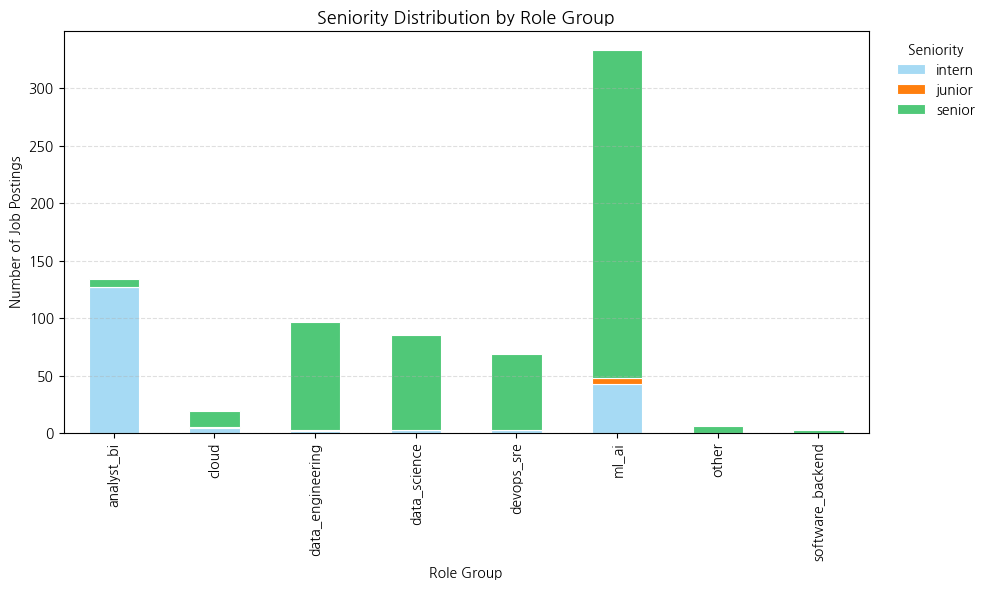

In [163]:
order = ["intern", "junior", "senior"]
role_sr_df = role_sr_df.reindex(columns=order).fillna(0)

colors = [COLOR_MAP[c] for c in role_sr_df.columns]

ax = role_sr_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=colors,
    edgecolor="white",
    linewidth=0.8
)

# 스타일 정리
ax.set_title("Seniority Distribution by Role Group", fontsize=13)
ax.set_xlabel("Role Group")
ax.set_ylabel("Number of Job Postings")

ax.legend(
    title="Seniority",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

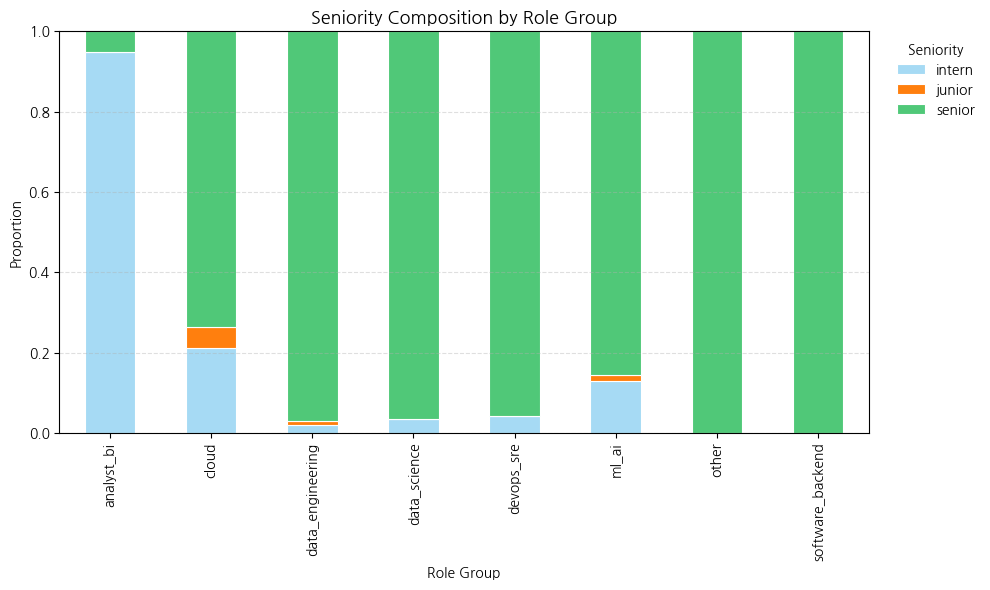

: 

In [ ]:
role_sr_ratio = role_sr_df.div(role_sr_df.sum(axis=1), axis=0)

ax = role_sr_ratio.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=colors,
    edgecolor="white",
    linewidth=0.8
)

ax.set_title("Seniority Composition by Role Group", fontsize=13)
ax.set_xlabel("Role Group")
ax.set_ylabel("Proportion")

ax.legend(
    title="Seniority",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

ax.set_ylim(0, 1)
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [ ]:

# 저장
#df.to_csv("jobs_with_title_features.csv", index=False)


## 3) 데이터 결측치 확인 및 처리

In [76]:
nan_count_by_year = (
    df_test[df_test["ai_keywords"].notna()]
    .groupby("posting_year")
    .size()
)
nan_count_by_year

posting_year
2010     34
2011     29
2012     24
2013     31
2014     59
2015     53
2016     42
2017     53
2018    105
2019    116
2020    114
2021    128
2022    193
2023    203
2024    214
2025    225
dtype: int64

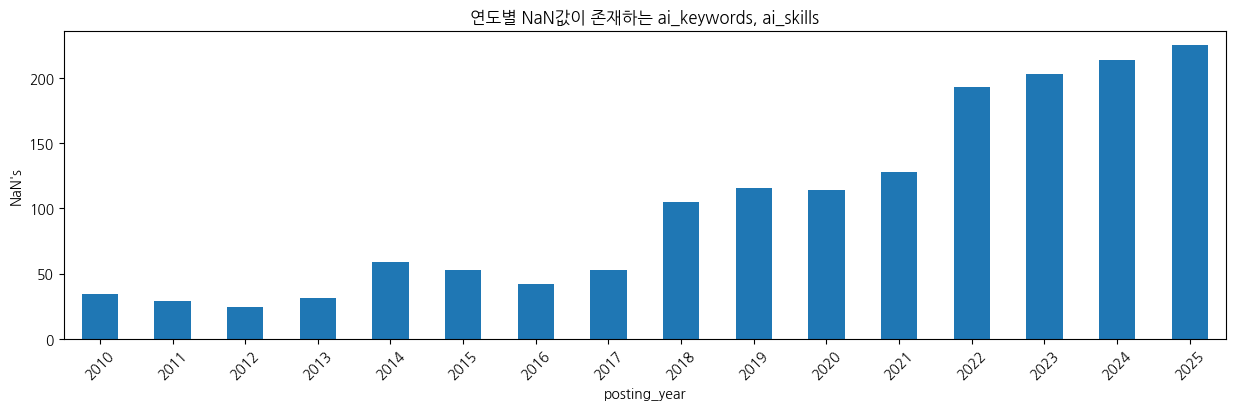

In [97]:
plt.figure(figsize=(15,4))
nan_count_by_year.plot(kind='bar')
plt.title("연도별 NaN값이 존재하는 ai_keywords, ai_skills")
plt.ylabel("NaN's")
plt.xticks(rotation=45)
plt.show()

In [98]:
# 연도별 AI 언급 비율 시각화
df_test["ai_mentioned"] = df_test["ai_keywords"].notna()
df_test.head(1)

,posting_year,ai_keywords,ai_skills,industry_ai_adoption_stage,ai_mentioned
3573,2010,NaN,NaN,Emerging,False


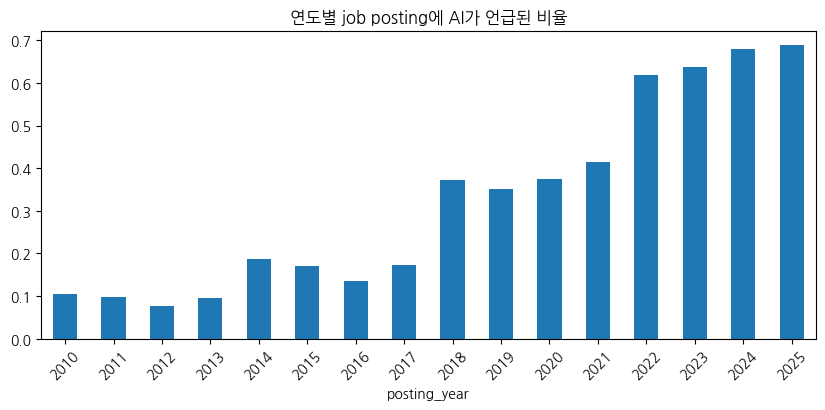

In [115]:
ai_mentioned_by_year = df_test.groupby("posting_year")["ai_mentioned"].mean()

plt.figure(figsize=(10,4))
ai_mentioned_by_year.plot(kind='bar')
plt.title("연도별 job posting에 AI가 언급된 비율")
plt.xticks(rotation=45)
plt.show()

## 4) 데이터 이상치 확인 및 처리

<Axes: ylabel='salary_usd'>

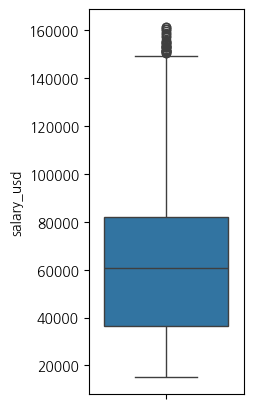

In [109]:
plt.figure(figsize=(2,5))
sns.boxplot(df["salary_usd"])

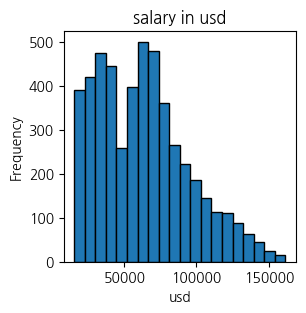

In [114]:
plt.figure(figsize=(3,3))
df["salary_usd"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("salary in usd")
plt.xlabel("usd")
plt.show()

## 5) 파생변수 생성하기

In [118]:
df.head(5)

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,...,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,...,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Sydney,Future Analytics,Startup,Finance,Product Manager,Junior,...,0.15,"Statistics, Project Management, Cloud Computin...",NaN,27035,3.55,0.86,False,High,2,Emerging
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Nairobi,Global Technologies,Large,Government,Data Scientist,Mid,...,0.19,"Cloud Computing, SQL, Project Management, Comm...",NaN,72894,-2.80,0.70,False,Low,15,Emerging
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Sydney,Future Technologies,Small,Manufacturing,ML Engineer,Lead,...,0.11,"SQL, Python, Communication, Software Engineeri...",NaN,57215,0.85,0.87,False,High,13,Emerging


# 3. 데이터 탐색

## 1) 변수별 특징 파악

## 2) 그룹별 특징 파악

## 3) 변수간 관계 파악